### Question 1: What is Dimensionality Reduction? Why is it important in machine learning?

**Answer (detailed):**

**Definition:** Dimensionality reduction is the set of techniques used to reduce the number of input features (variables) in a dataset while retaining as much of the relevant information as possible. The reduced representation can be either a subset of the original features (feature selection) or new features created from transformations of the original ones (feature extraction).

**Why it's important:**

1. **Mitigating the curse of dimensionality:** As dimensionality (number of features) increases, the volume of the feature space grows exponentially. Data become sparse which makes learning harder, distances less meaningful, and models prone to overfitting. Reducing dimensions helps produce denser, more learnable representations.
2. **Noise reduction and improved generalization:** Many features may be noisy or irrelevant. Removing or combining them can improve model generalization (better performance on unseen data).
3. **Computational efficiency:** Fewer features mean lower memory usage and faster training and inference, which is important for large datasets or resource-constrained environments.
4. **Visualization:** Humans can only directly visualize up to 3 dimensions; dimensionality reduction (to 2D or 3D) enables plotting and visual inspection of the structure in the data (clusters, outliers, etc.).
5. **Multicollinearity handling:** When features are highly correlated, reducing to orthogonal components (e.g., PCA) can remove redundancy and make downstream models more stable.

### Question 2: Name and briefly describe three common dimensionality reduction techniques.

**Answer (detailed):** Here are three widely used techniques with intuition, strengths, and limitations:

1. **Principal Component Analysis (PCA)**  
   - **Type:** Linear, unsupervised feature-extraction method.  
   - **Idea:** Find orthogonal directions (principal components) in feature space that capture the largest variance. Project data onto the top-k components to reduce dimensionality.  
   - **Strengths:** Fast, deterministic, preserves global structure related to variance, easy to implement, gives orthogonal components.  
   - **Limitations:** Only captures linear relationships; components can be hard to interpret as they are linear combinations of original features. Sensitive to scaling, so standardization is often required.

2. **t-SNE (t-distributed Stochastic Neighbor Embedding)**  
   - **Type:** Nonlinear, unsupervised, primarily for visualization (2D/3D).  
   - **Idea:** Converts pairwise similarities in high-dimensional space into probabilities and attempts to preserve local neighborhood structure when embedding into low dimensions. Uses a heavy-tailed Student-t distribution in low-dim space to avoid the “crowding problem.”  
   - **Strengths:** Excellent at revealing cluster structure and local manifold geometry in 2D/3D visualizations.  
   - **Limitations:** Computationally expensive for large datasets, non-deterministic unless random seed fixed, not suitable for preserving global distances, and not ideal as a preprocessing step for many ML models (primarily for visualization). Hyperparameters (perplexity, learning rate) need tuning.

3. **UMAP (Uniform Manifold Approximation and Projection)**  
   - **Type:** Nonlinear, unsupervised; manifold learning method.  
   - **Idea:** Builds a local fuzzy topology (graph) of the high-dimensional data and optimizes a low-dimensional representation that has a similar fuzzy topological structure. UMAP is rooted in manifold theory and Riemannian geometry.  
   - **Strengths:** Usually faster than t-SNE on larger datasets, preserves both local and some global structure better than t-SNE, good for visualization and also sometimes useful as a preprocessing step for downstream tasks.  
   - **Limitations:** Still requires hyperparameter tuning (n_neighbors, min_dist), and like other manifold methods, embeddings can be sensitive to noise and sampling density.

### Question 3: What is clustering in unsupervised learning? Mention three popular clustering algorithms.

**Answer (detailed):**

**What is clustering?**  
Clustering is an unsupervised learning task whose goal is to partition a dataset into groups (clusters) such that points within the same cluster are more similar to each other than to points in other clusters. Because labels are not provided, clustering algorithms infer structure solely from the data (distances, densities, connectivity). Clustering is used for exploratory data analysis, segmentation (customers, documents), anomaly detection, and as preprocessing for other methods.

**Three popular clustering algorithms:**

1. **K-means**  
   - **Idea:** Partition data into K clusters by minimizing the within-cluster sum of squared distances to the cluster centroids. Iteratively assigns points to nearest centroid and recomputes centroids until convergence.  
   - **Strengths:** Simple, fast, scales well to large datasets.  
   - **Limitations:** Assumes spherical (convex) clusters of similar size; requires choosing K; sensitive to initialization and outliers.
   - **Complexity:** O(n · k · t · d) where n = samples, k = clusters, t = iterations, d = dims.

2. **Hierarchical Clustering (Agglomerative / Divisive)**  
   - **Idea:** Builds a tree (dendrogram) of cluster merges (agglomerative) or splits (divisive). Agglomerative starts with each point as its own cluster and merges closest clusters iteratively using a linkage criterion (single, complete, average, ward).  
   - **Strengths:** Produces a hierarchy that lets you choose granularity; does not require specifying number of clusters up-front (you can cut the dendrogram).  
   - **Limitations:** Computationally expensive for large n (O(n^2) or worse), choice of linkage and distance metric affects results.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**  
   - **Idea:** Groups points into clusters based on density — a cluster is a region with many nearby points. Points in low-density regions are labeled as noise (outliers). Uses parameters `eps` (neighborhood radius) and `min_samples` (min points to form dense region).  
   - **Strengths:** Can find arbitrarily-shaped clusters, robust to outliers, does not require number of clusters in advance.  
   - **Limitations:** Performance depends on `eps` choice; struggles with clusters of varying density; less effective in high-dimensional spaces.

### Question 4: Explain the concept of anomaly detection and its significance.

**Answer (detailed):**

**What is anomaly detection?**  
Anomaly detection (aka outlier detection) is the process of identifying observations in data that do not conform to the expected pattern. Anomalies are rare events or patterns that differ significantly from the majority of the data. Depending on context, anomalies can indicate important behaviors: fraud, faults, novel phenomena, or data errors.

**Types of anomalies:**  
- **Point anomalies:** Individual data points that deviate strongly from the rest (e.g., a single fraudulent transaction).  
- **Contextual (conditional) anomalies:** Points that are anomalous in a particular context (e.g., a temperature that's normal for summer may be anomalous in winter). Context is often time or space.  
- **Collective anomalies:** A collection of related instances that are anomalous together (e.g., a sequence of network packets forming an intrusion), though individually they might look normal.

**Significance / Applications:**  
- **Fraud detection:** Credit card fraud, insurance claims, fake reviews.  
- **Intrusion detection & cybersecurity:** Detect unusual access patterns, malware, or network anomalies.  
- **Industrial monitoring & predictive maintenance:** Detect sensor readings that indicate equipment failure.  
- **Healthcare:** Identify abnormal patient vitals or rare disease patterns.  
- **Data quality:** Flag corrupted, missing or malformed records.

**Challenges:**  
- **Rarity of anomalies:** Few or no labeled anomalous examples, making supervised learning hard.  
- **Changing normal behavior:** “Normal” patterns can drift over time, requiring online/adaptive models.  
- **High-dimensional data:** Distance and density measures become less meaningful (curse of dimensionality).  
- **Evaluation difficulty:** Ground truth is rare, and metrics must reflect the cost of false positives vs false negatives.

**Evaluation metrics:** Precision, recall, F1-score on labeled anomalies (if available), precision at k, area under ROC or PR curves, and domain-specific cost functions (e.g., monetary loss for fraud).

### Question 5: List and briefly describe three types of anomaly detection techniques.

**Answer (detailed):**

1. **Statistical Methods (Parametric & Nonparametric)**  
   - **Overview:** Assume a statistical model for the normal data distribution and flag points that fall in low-probability regions. Examples include Z-score thresholds, Gaussian models, or more sophisticated mixture models.  
   - **When to use:** When you have domain knowledge or when data reasonably follows a known distribution.  
   - **Pros/Cons:** Simple and interpretable; may fail if distributional assumptions are wrong or data are multi-modal.

2. **Distance / Density-Based Methods**  
   - **Overview:** Rely on distances between points or local density estimates. Examples: k-NN anomaly scoring (distance to k-th neighbor), LOF (Local Outlier Factor), and DBSCAN-based outlier identification. Points far from others or in low-density regions are anomalous.  
   - **When to use:** When clusters or dense regions represent normal behavior, and anomalies are isolated.  
   - **Pros/Cons:** Intuitive and effective in many settings; suffers in high dimensions and with varying-density clusters.

3. **Machine Learning / Model-Based Methods**  
   - **Overview:** Use learning algorithms to model normal data. Broad subtypes:
     - **Unsupervised models:** Isolation Forest (random partitioning isolates anomalies quickly), One-Class SVM (learn boundary around normal class), Autoencoders (neural nets trained to reconstruct normal data; high reconstruction error = anomaly).  
     - **Semi-supervised / Supervised models:** When some labeled anomalies are available — train classifiers or anomaly detectors directly.  
   - **When to use:** Large datasets, complex patterns, non-linear relationships.  
   - **Pros/Cons:** Often powerful and flexible; can require careful tuning, sufficient data, and may be less interpretable.

**Other approaches:** Ensemble methods (combine multiple detectors), time-series specific detectors (change-point detection, forecasting residual methods), and hybrid systems combining domain rules and learned models.

**Practical considerations:** Preprocessing (scaling, handling missing values), feature engineering, threshold selection (operational trade-off), and continuous monitoring for data drift.

### Question 6: What is time series analysis? Mention two key components of time series data.

**Answer (detailed):**

**What is time series analysis?**  
Time series analysis studies datasets where observations are indexed in time order (e.g., hourly sensor readings, daily sales, stock prices). The aim is to understand underlying structure (trend, seasonality, cycles), model temporal dependencies, forecast future values, and detect anomalies or regime changes.

**Key components of time series data (common decomposition):**  
1. **Trend:** Long-term increase or decrease in the series (e.g., overall sales growth).  
2. **Seasonality:** Regular, repeating patterns at fixed periods (daily, weekly, yearly).  
3. **Cyclical (cycles):** Repeating patterns without a fixed period, typically tied to economic or domain cycles (longer and irregular compared to seasonality).  
4. **Residual / Noise:** Irregular, random variation left after removing trend and seasonality.

**Important concepts:** Stationarity (constant mean/variance over time), autocorrelation (correlation between observations separated by time lags), partial autocorrelation, and lag features. Tools for analysis include ACF/PACF plots, decomposition methods (additive/multiplicative), ARIMA/SARIMA models, exponential smoothing (ETS), state-space models, and modern machine-learning approaches (RNNs, Transformers, Prophet).

### Question 7: Describe the difference between seasonality and cyclic behavior in time series.

**Answer (detailed):**

**Seasonality:**  
- Seasonality refers to patterns that repeat at *fixed, known* intervals (periodic). Examples: daily website traffic peaking each evening, weekly retail sales rising on weekends, or yearly temperature changes.  
- The period is known and stable (e.g., period = 7 days, 12 months). Seasonality is often driven by calendar-related factors and is predictable once estimated.

**Cyclic behavior:**  
- Cyclical behavior also involves rises and falls over time but **does not have a fixed period** and is usually longer-term and influenced by broader economic, business, or environmental factors (e.g., business cycles, multi-year booms and recessions).  
- Cycles are less regular and not strictly periodic; their duration and amplitude can vary, making them harder to model with simple seasonal terms.

**Practical differences:**  
- Seasonality can be modeled with seasonal components in ARIMA/SARIMA, Fourier terms, or seasonal decomposition techniques (STL).  
- Cycles often require domain knowledge, regime-switching models, or trend modeling approaches and are harder to forecast precisely because their timing and length vary.

**Example:** Retail sales have **seasonality** every year around December (holidays). A multi-year economic **cycle** (recession followed by recovery) is cyclical and does not repeat on a strict schedule.

### Question 8: Write Python code to perform K-means clustering on a sample dataset.

**Answer (detailed):** The code below shows a complete example: generate synthetic data, run K-means, show cluster assignments and centroids, display inertia and silhouette score (internal metric). The plot visualizes clusters and centroids. Run the cell to see output.


K-means fitted with k=3
Inertia (sum of squared distances to centroids): 566.86
Silhouette Score (higher better, range -1..1): 0.848


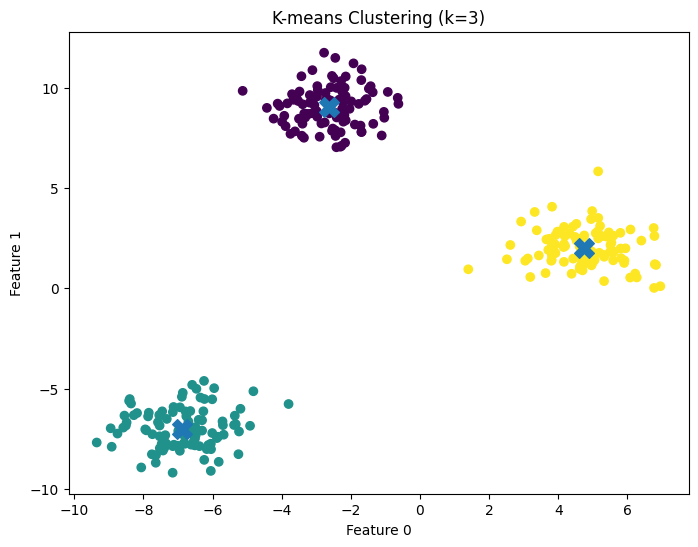

In [3]:

# K-means clustering example (detailed): generate data, fit KMeans, evaluate and plot.
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Fit KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
sil_score = silhouette_score(X, labels)

print(f"K-means fitted with k={k}")
print(f"Inertia (sum of squared distances to centroids): {inertia:.2f}")
print(f"Silhouette Score (higher better, range -1..1): {sil_score:.3f}")

# Plot clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels)  # note: color mapping chosen automatically by matplotlib
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200)  # centroids
plt.title("K-means Clustering (k=3)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Question 9: What is inheritance in OOP? Provide a simple example in Python.

**Answer (detailed):**

**Definition & purpose:**  
Inheritance is an OOP mechanism where one class (child/subclass) inherits attributes and methods from another class (parent/superclass). It enables code reuse, logical organization (is-a relationships), and polymorphism (overriding methods to change behavior).

**Types of inheritance:** single, multiple (multiple parents), multilevel (chain of inheritance), hierarchical (one parent, many children), and hybrid.

**Key ideas:**  
- **`super()`**: used in subclasses to call methods (often `__init__`) of the parent class.  
- **Method overriding:** A subclass can provide its own implementation of a method defined in the parent class.  
- **Polymorphism:** Code can use parent-type references while actual method calls dispatch to subclass implementations.

**Simple Python example (shown also in the runnable cell below):** a `Person` superclass and `Employee` subclass overriding and extending functionality. See code cell for runnable demonstration.


In [1]:

# OOP Inheritance example in Python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def greet(self):
        return f"Hello, my name is {self.name} and I'm {self.age} years old."

class Employee(Person):
    def __init__(self, name, age, employee_id, role):
        super().__init__(name, age)             # call parent constructor
        self.employee_id = employee_id
        self.role = role

    def greet(self):
        base = super().greet()                 # reuse parent method
        return f"{base} I work as a {self.role} (ID: {self.employee_id})."

    def annual_report(self):
        return f"Employee {self.employee_id} ({self.name}) completed the annual report."

# Demonstration
e = Employee("Asha", 29, "E102", "Data Scientist")
print(e.greet())
print(e.annual_report())


Hello, my name is Asha and I'm 29 years old. I work as a Data Scientist (ID: E102).
Employee E102 (Asha) completed the annual report.


### Question 10: How can time series analysis be used for anomaly detection?

**Answer (detailed):**

**General approach:** Use models that capture expected temporal behavior, then flag observations that significantly deviate from model predictions or expected patterns.

**Common methods / patterns:**

1. **Forecasting residuals:** Fit a forecasting model (ARIMA, ETS, Prophet, LSTM) on historical "normal" data and compute residuals (observed − predicted). If residuals exceed thresholds (e.g., mean ± 3·std or statistically derived bounds), mark as anomalies. This captures context and seasonality automatically if the model is appropriate.

2. **Seasonal decomposition (STL) + thresholding:** Decompose series into trend, seasonal, and residual components. Analyze the residual component for unusually large values.

3. **Windowed statistical tests:** Use rolling statistics (mean, MAD, quantiles) over a sliding window to detect outliers relative to local behavior; suitable for concept-drifting series.

4. **Change-point detection:** Detect points where the statistical properties of the series change (mean/variance shifts). Methods include CUSUM, Bayesian change-point models, and offline/online algorithms like Ruptures library algorithms.

5. **Density / clustering on time-embedded vectors:** Embed short windows of the series into feature vectors (lag features, sliding windows) and apply density-based anomaly detectors (LOF, isolation forest) on the embedding.

6. **Sequence models / deep learning:** Use LSTM/GRU/transformer autoencoders trained to reconstruct normal sequences; large reconstruction or prediction error signals anomalies.

**Practical pipeline:**  
- **Preprocessing:** handle missing values, transform (log, box-cox) to stabilize variance, remove trend/seasonality or let model handle them.  
- **Modeling:** choose model matching data properties (seasonal, non-stationary). Validate with cross-validation adapted for time series (time-based splits).  
- **Scoring & threshold selection:** use statistical thresholds, percentile-based rules, or a validation set of labeled anomalies to choose thresholds. Consider business cost of false positives vs false negatives.  
- **Monitoring & adaptation:** retrain or adapt models periodically for concept drift; include human-in-the-loop feedback when feasible.

**Example use-case:** For server metrics (CPU usage), fit a seasonal model that captures daily cycles. If observed CPU 5-minute averages exceed predicted 95% confidence band, trigger an alert. For manufacturing sensors, monitor residuals from an autoencoder trained on healthy operational data; a persistent high residual indicates possible equipment fault.

**Evaluation:** Use precision/recall, time-to-detect, and false alarm rate, and ideally create labeled incident windows to measure performance under realistic conditions.